#### Importing pandas library to import jm1_csv dataset. 

In [1]:
import  warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('jm1_csv.csv')
df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51,10,8,1,17.0,36.0,112.0,86.0,13.0,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129,29,28,2,17.0,135.0,329.0,271.0,5.0,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28,1,6,0,11.0,16.0,76.0,50.0,7.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,0.08,98.38,13,0,2,0,10.0,15.0,30.0,22.0,7.0,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,0.04,59.43,5,0,2,0,12.0,8.0,19.0,11.0,3.0,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,0.17,762.04,29,1,10,0,18.0,15.0,59.0,44.0,7.0,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,0.05,68.98,6,0,2,0,9.0,8.0,21.0,15.0,1.0,False


#### Importing other libraries for data visualization purpose

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline               
import seaborn as sns
sns.set()  

####  Information gain from this command is


1.   There are 10885 rows with 22 columns.
2.   There are three int values and targert value(defects) is in bool type.
3. Therer are some null values



In [3]:
df.info()  # gives info as how my dataset is with size,dtypes and null values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

#### It describe the columns(features) name


In [4]:
df.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

#### checking null value in each feature of dataset.

---
5 columns have 5 null values in each.



In [5]:
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

In [6]:
import numpy as np  # numpy is python library uses for mathematical calucaltion.
data = df.copy()    # copying dataset 

#### Provided code describes the columns wich has missing values with percentage of missing values.

In [7]:

column_with_nan = [column for column in data.columns if data[column].isnull().sum()>1]


for column in column_with_nan:
  print(f'{column},{np.round(data[column].isnull().mean(),4)}, % missing value')


uniq_Op,0.0005, % missing value
uniq_Opnd,0.0005, % missing value
total_Op,0.0005, % missing value
total_Opnd,0.0005, % missing value
branchCount,0.0005, % missing value


#### As it seems very less null values are in dataset so better to drop the such observations.

In [8]:
data.dropna(inplace=True)  # drops the null values

#### As target column in dataset is in bool type so replaced it with 1 and 0.

In [9]:
data.defects.replace({True : 1, False : 0}, inplace=True)  # True replaced with 1 and False replaced with 0.

#### Describes the target column after replacement.

In [10]:
data.defects  

0        0
1        1
2        1
3        1
4        1
        ..
10880    0
10881    0
10882    0
10883    0
10884    0
Name: defects, Length: 10880, dtype: int64

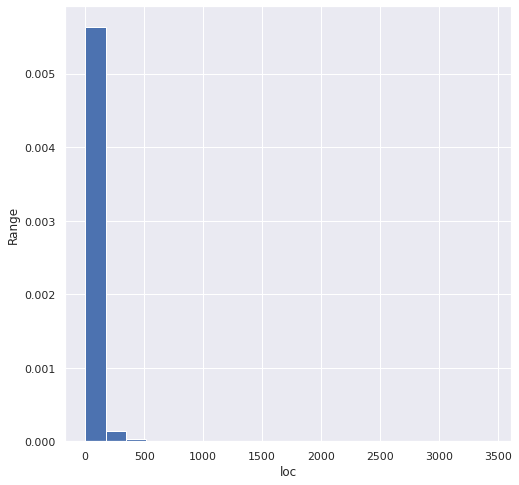

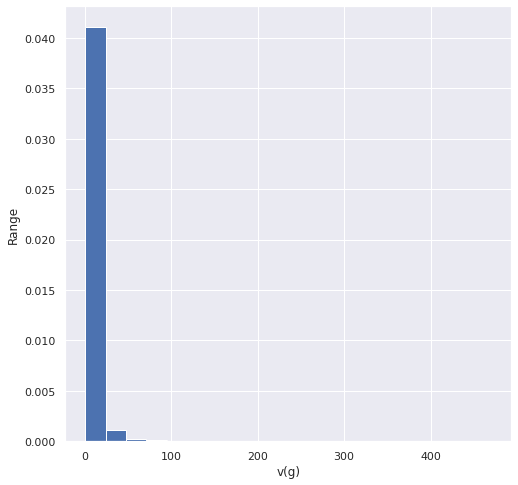

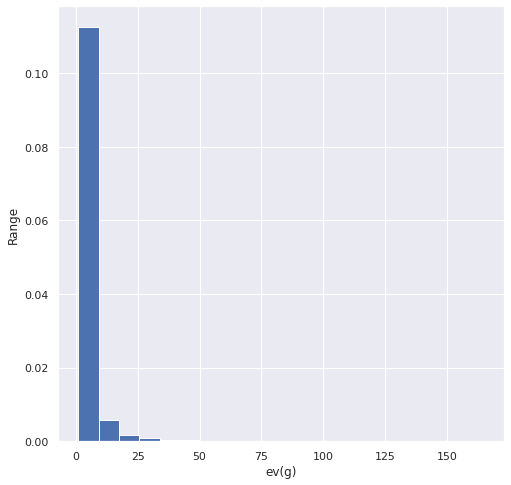

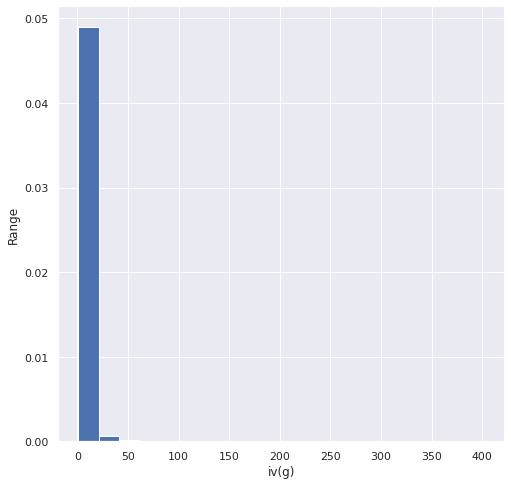

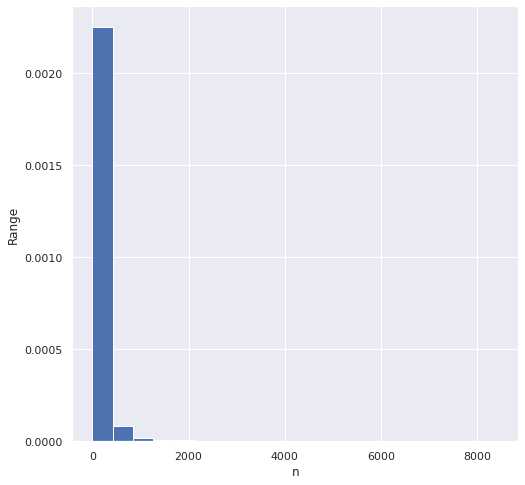

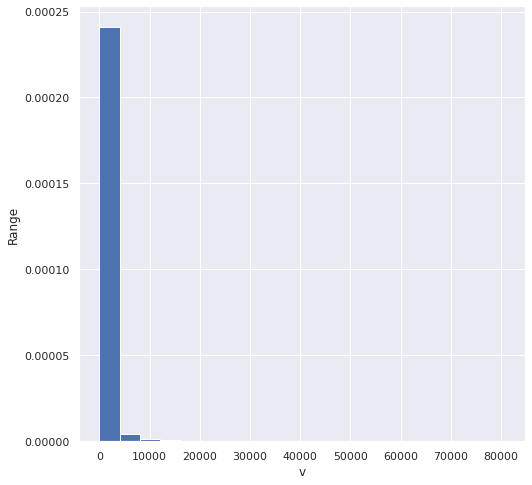

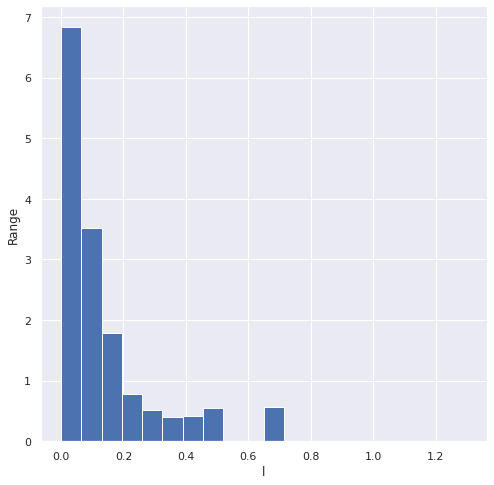

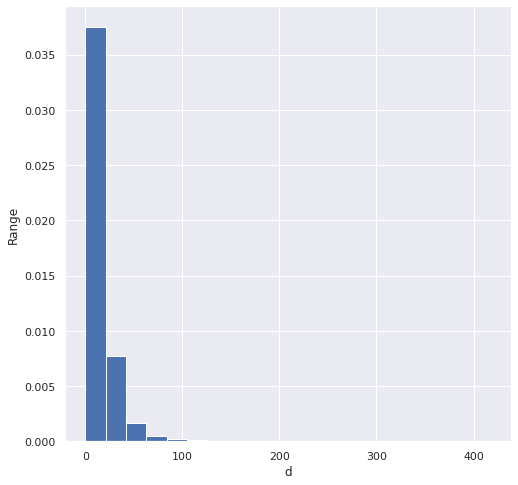

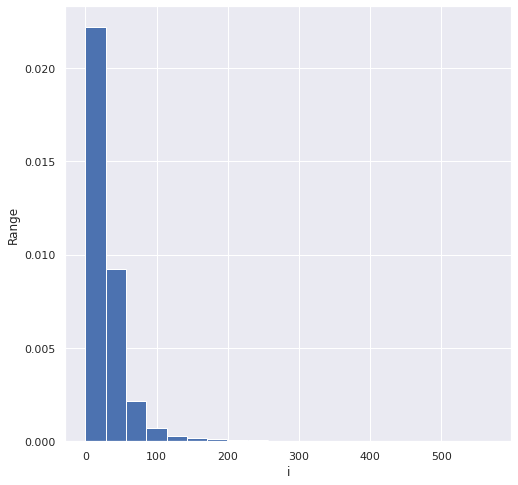

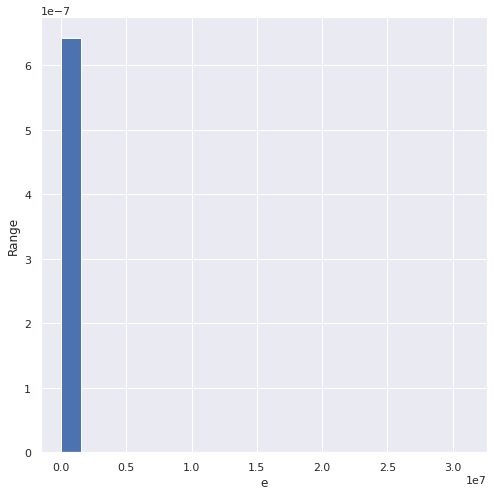

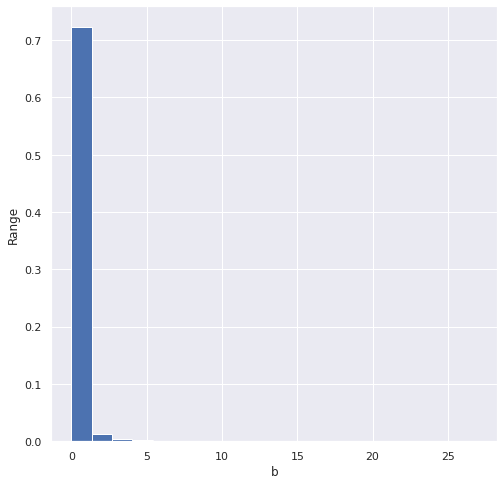

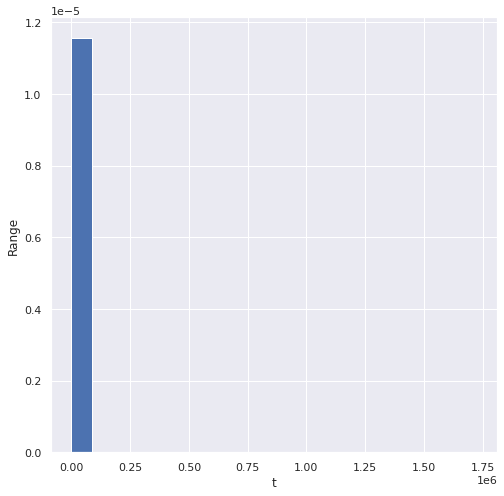

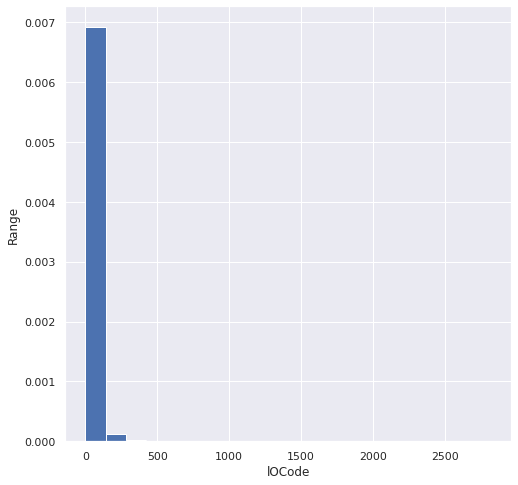

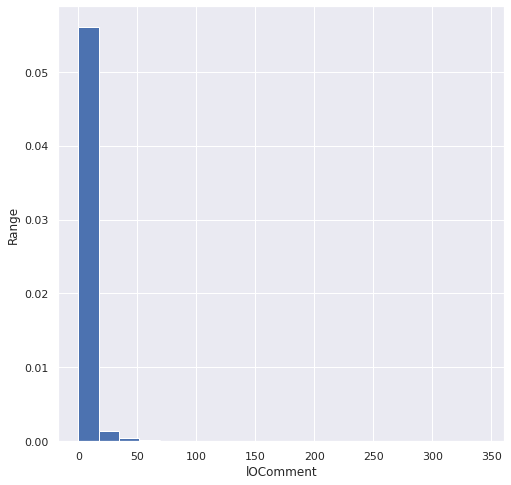

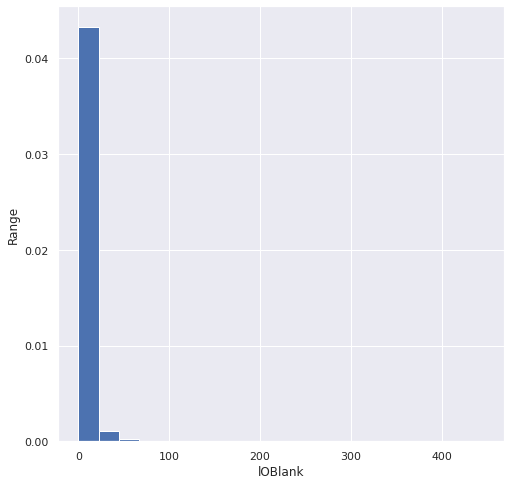

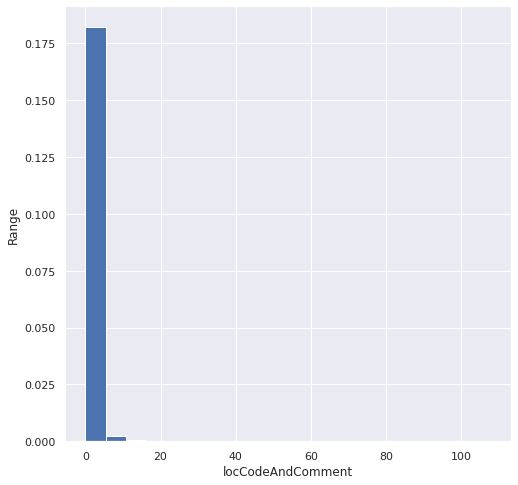

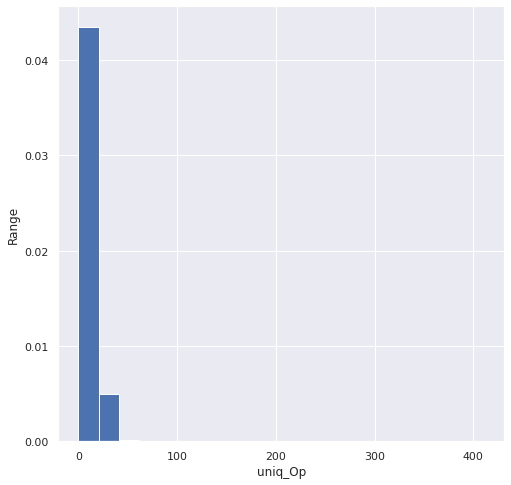

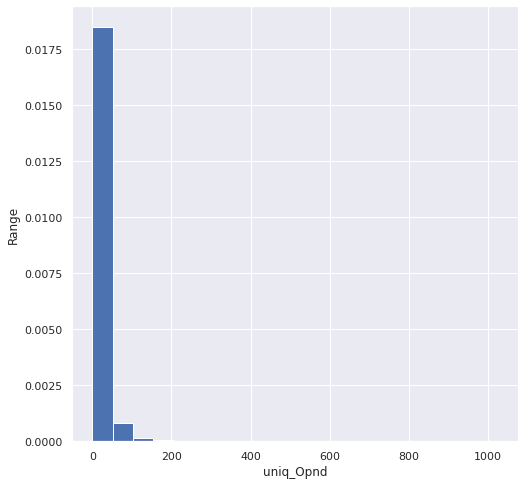

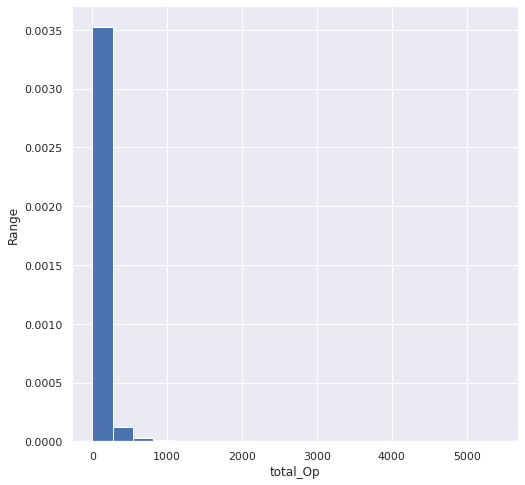

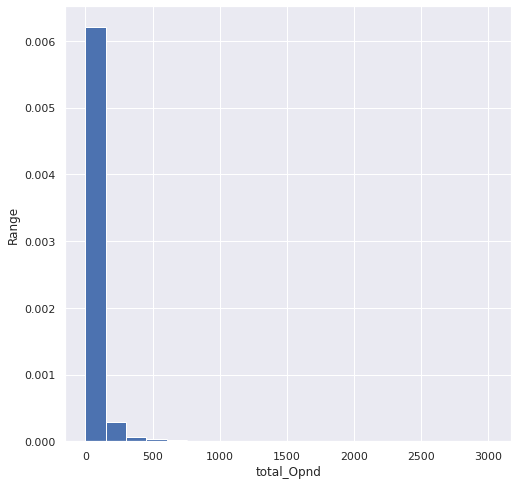

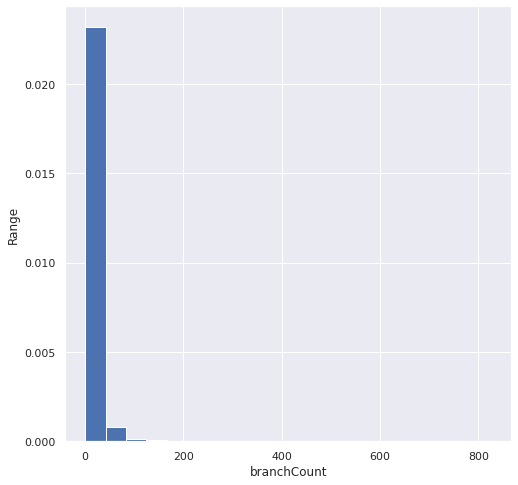

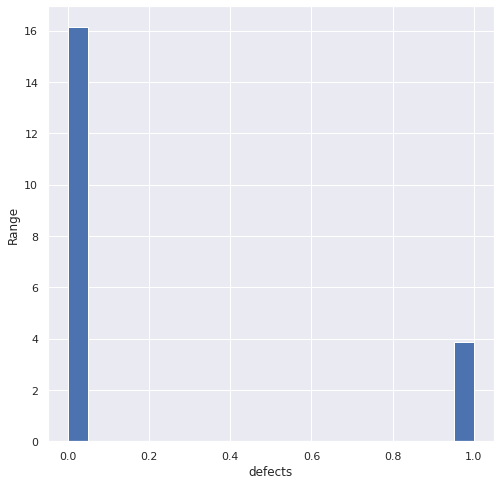

In [11]:
#plt.figure(figsize = (8,8))
for feature in data.columns:
        plt.figure(figsize = (8,8))
        plt.hist(data[feature],density=True,bins=20)
        plt.xlabel(feature)
        plt.ylabel('Range')
        plt.show()

#### Visualizing the number of True and false in target column
Information gain:-
1. Dataset is completely imbalance.
2. More number of False then True.
3. Dataset need scaling as features values are lies in different scale.



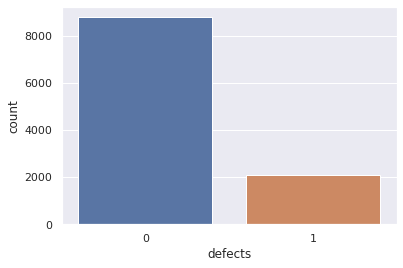

In [12]:
sns.countplot(x = data['defects'])

#### Importing smotetomek for overmsapling 
#### Saving no. of False in data_False and True in Data_True from target column. 

In [13]:

''' SMOTETomek is somewhere upsampling and downsampling. SMOTETomek is a hybrid method which is a mixture of the above two methods, 
it uses an under-sampling method (Tomek) with an oversampling method (SMOTE).'''
data_False = data.defects[data.defects == 0]
data_True = data.defects[data.defects == 1]

#### comparision of imbalance in percentage
Information gain:-

1. 81% of Flase obervation and 19% of True obervation (approx.)
2. ratio is in 8:2 which is completly imbalance.

In [14]:
data_True_per = (len(data_True)/len(data))*100
data_False_per = (len(data_False)/len(data))*100
print(f'percentage of True present in dataset = {data_True_per} %')
print(f'percentage of False present in dataset =  {data_False_per}  %')

percentage of True present in dataset = 19.329044117647058 %
percentage of False present in dataset =  80.67095588235294  %


#### Splitting dataset in X and y column for handling imbalance in dataset.

In [15]:
X = data.drop('defects',axis=1)
y = data['defects']

#### Checking total no. of False and True present in target feature.

In [16]:
from collections import Counter # provides the count of values in that feature
counter = Counter(data['defects'])
print(counter)

Counter({0: 8777, 1: 2103})


#### Applying smotetomek for oversampling True as well as downsasmpling False values.


---
#### Also printing the count of values in target column previously and after applying Smotetomek.


In [17]:
''' SMOTETomek is somewhere upsampling and downsampling. SMOTETomek is a hybrid method which is a mixture of the above two methods, 
it uses an under-sampling method (Tomek) with an oversampling method (SMOTE).'''
from imblearn.combine import SMOTETomek
from collections import Counter
counter = Counter(data['defects'])
print(counter)
smt = SMOTETomek(random_state = 123)
X_res, y_res = smt.fit_resample(X,y)

counter2 = Counter(y_res)
print(counter2)


Counter({0: 8777, 1: 2103})
Counter({0: 8313, 1: 8313})


#### Visulizing the target column after handling imbalance in dataset
Information gain:- 
1. Both True and False values are now in same ration

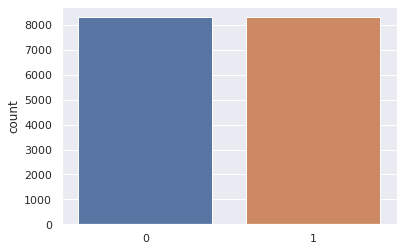

In [18]:
sns.countplot(y_res)

#### Creating dataset after handling the imablance.

In [19]:
X_resampled = pd.DataFrame(X_res,columns=X.columns)
X_resampled

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.100000,1.400000,1.400000,1.400000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,2.000000,2.000000,2.000000,2.000000,1.200000,1.200000,1.200000,1.200000,1.400000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,72.000000,7.000000,1.000000,6.000000,198.000000,1134.130000,0.050000,20.310000,55.850000,23029.100000,0.380000,1279.390000,51.000000,10.000000,8.000000,1.000000,17.000000,36.000000,112.000000,86.000000,13.000000
3,190.000000,3.000000,1.000000,3.000000,600.000000,4348.760000,0.060000,17.060000,254.870000,74202.670000,1.450000,4122.370000,129.000000,29.000000,28.000000,2.000000,17.000000,135.000000,329.000000,271.000000,5.000000
4,37.000000,4.000000,1.000000,4.000000,126.000000,599.120000,0.060000,17.190000,34.860000,10297.300000,0.200000,572.070000,28.000000,1.000000,6.000000,0.000000,11.000000,16.000000,76.000000,50.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16621,73.619410,8.582801,3.374201,7.165602,232.288206,1315.644450,0.030000,32.699209,40.670961,42774.482553,0.435398,2376.362988,59.288206,1.582801,9.122604,1.625799,21.539803,29.871007,143.331204,88.957002,16.165602
16622,5.211938,1.000000,1.000000,1.000000,8.423876,25.631922,0.344836,2.894031,8.991869,73.536550,0.010000,4.084775,2.211938,0.000000,1.000000,0.000000,5.788062,2.423876,6.000000,2.423876,1.000000
16623,161.999163,11.999581,7.399414,6.800084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.999163
16624,14.000000,2.696188,1.000000,1.303812,28.303812,114.920908,0.120000,8.506200,13.511020,977.477938,0.040000,54.305561,9.392377,0.000000,2.303812,0.000000,9.696188,7.000000,16.000000,12.303812,4.392377


In [20]:
y_resampled = pd.Series(y_res,name = 'defects')
y_resampled

0        0
1        1
2        1
3        1
4        1
        ..
16621    1
16622    1
16623    1
16624    1
16625    1
Name: defects, Length: 16626, dtype: int64

#### Concatinating X and y sample after resampling(handling imbalance).

In [21]:
sampled = pd.concat([X_resampled,y_resampled],axis=1)
sampled

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.100000,1.400000,1.400000,1.400000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,2.000000,2.000000,2.000000,2.000000,1.200000,1.200000,1.200000,1.200000,1.400000,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
2,72.000000,7.000000,1.000000,6.000000,198.000000,1134.130000,0.050000,20.310000,55.850000,23029.100000,0.380000,1279.390000,51.000000,10.000000,8.000000,1.000000,17.000000,36.000000,112.000000,86.000000,13.000000,1
3,190.000000,3.000000,1.000000,3.000000,600.000000,4348.760000,0.060000,17.060000,254.870000,74202.670000,1.450000,4122.370000,129.000000,29.000000,28.000000,2.000000,17.000000,135.000000,329.000000,271.000000,5.000000,1
4,37.000000,4.000000,1.000000,4.000000,126.000000,599.120000,0.060000,17.190000,34.860000,10297.300000,0.200000,572.070000,28.000000,1.000000,6.000000,0.000000,11.000000,16.000000,76.000000,50.000000,7.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16621,73.619410,8.582801,3.374201,7.165602,232.288206,1315.644450,0.030000,32.699209,40.670961,42774.482553,0.435398,2376.362988,59.288206,1.582801,9.122604,1.625799,21.539803,29.871007,143.331204,88.957002,16.165602,1
16622,5.211938,1.000000,1.000000,1.000000,8.423876,25.631922,0.344836,2.894031,8.991869,73.536550,0.010000,4.084775,2.211938,0.000000,1.000000,0.000000,5.788062,2.423876,6.000000,2.423876,1.000000,1
16623,161.999163,11.999581,7.399414,6.800084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.999163,1
16624,14.000000,2.696188,1.000000,1.303812,28.303812,114.920908,0.120000,8.506200,13.511020,977.477938,0.040000,54.305561,9.392377,0.000000,2.303812,0.000000,9.696188,7.000000,16.000000,12.303812,4.392377,1


In [22]:
sampled.shape # checking the size after resampling.

(16626, 22)

In [23]:
X_resampled.describe()   # descirbes the statistical overview of dataset 

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,1.662600e+04,16626.000000,1.662600e+04,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000
mean,54.572916,8.169347,4.250500,5.135547,147.786610,912.064567,0.116644,16.206687,33.370430,5.814585e+04,0.304192,3.230325e+03,33.665464,3.706052,5.887177,0.519703,12.209490,20.297265,88.224216,59.628514,14.706909
std,95.625951,16.379504,8.113162,11.505180,319.618891,2524.349208,0.147082,21.401127,38.860381,5.252994e+05,0.841484,2.918330e+04,75.181534,10.783741,11.132067,2.020124,11.625508,33.101605,194.351903,127.362301,28.333275
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,14.000000,2.000000,1.000000,1.000000,15.000000,53.770000,0.030000,3.500000,12.690000,1.998375e+02,0.020000,1.110017e+01,4.000000,0.000000,0.000000,0.000000,6.000000,5.000000,9.000000,6.000000,3.000000
50%,28.000000,4.000000,1.000000,2.675061,58.000000,268.584946,0.060000,10.290000,24.167734,2.857520e+03,0.090000,1.587500e+02,15.000000,0.000000,3.000000,0.000000,11.914527,12.395898,35.000000,23.000000,7.000000
75%,62.960636,9.000000,4.376070,5.000000,149.645517,800.597639,0.130000,21.936803,41.200000,1.710964e+04,0.269504,9.505313e+02,35.831079,3.000000,7.000000,0.000000,17.127468,25.000000,89.000000,60.550671,15.950082
max,3442.000000,470.000000,140.000000,402.000000,8441.000000,80843.080000,1.300000,408.730000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.000000,108.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000


#### Applying histogram to see the distribution of data.
Information gain:-
1. Huge number of ouliers in dataset.
2. Not Handling outliers as each values are calculated and have specification.

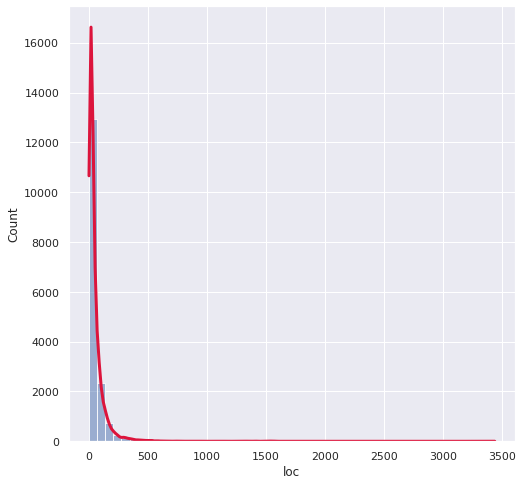

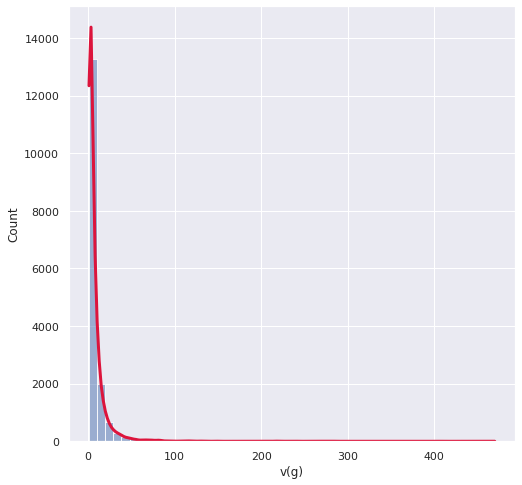

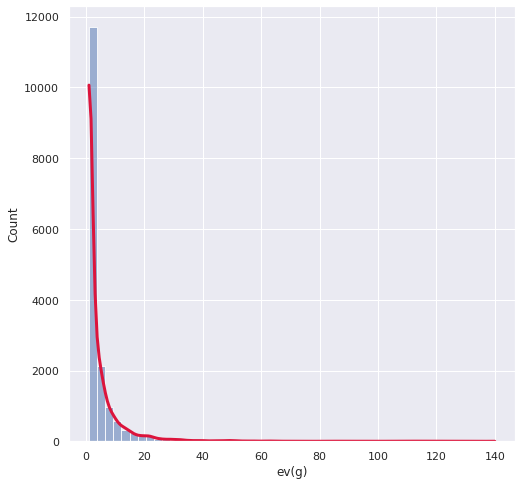

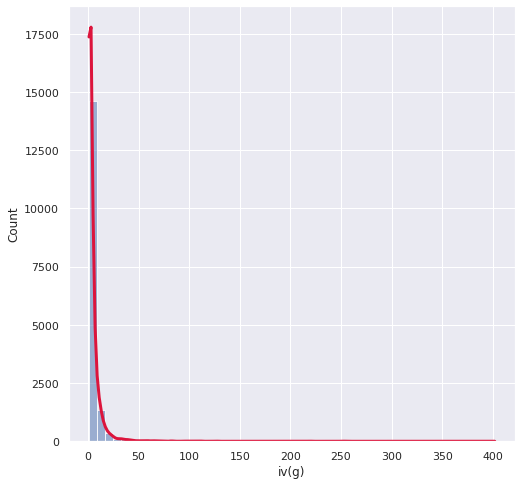

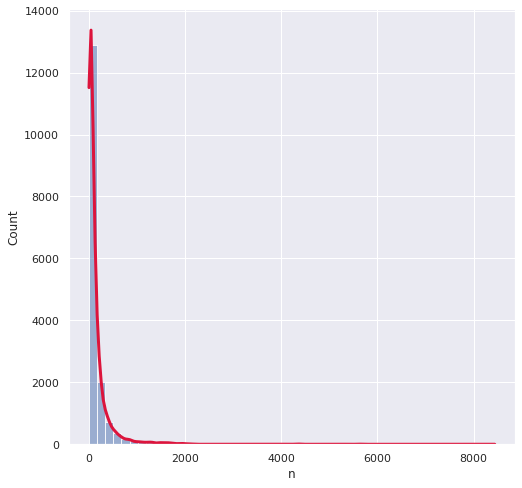

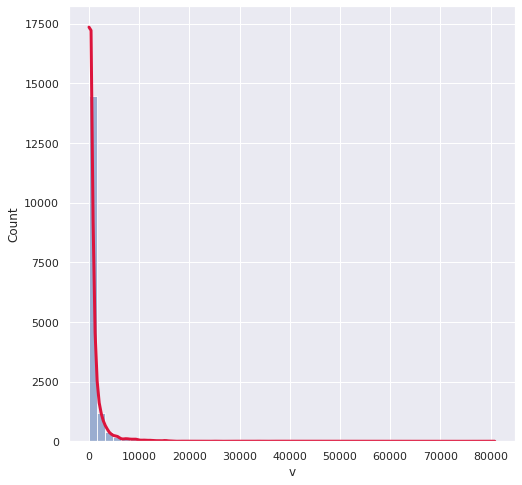

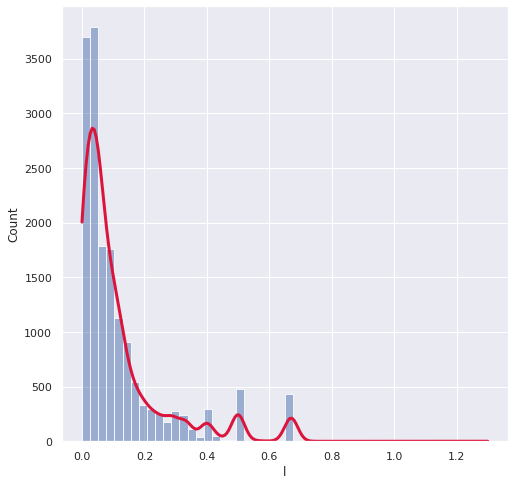

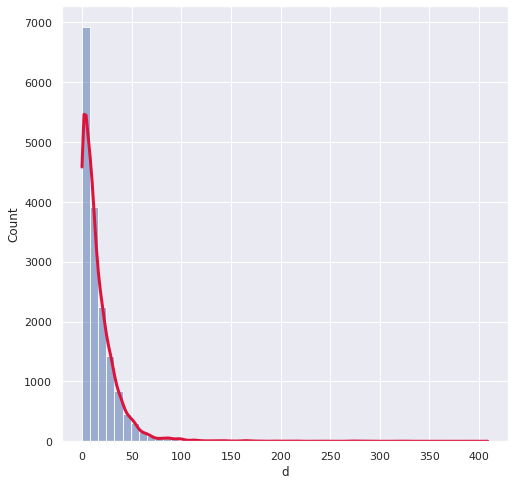

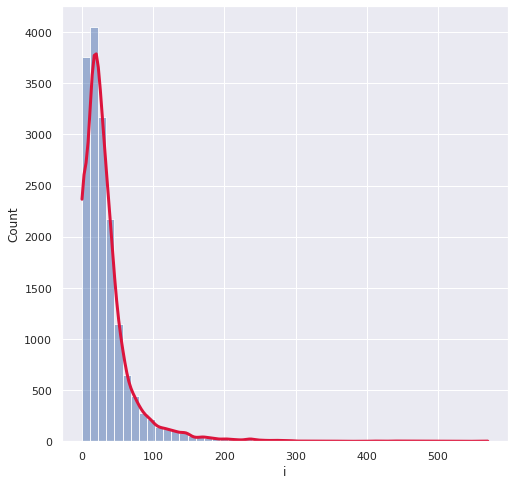

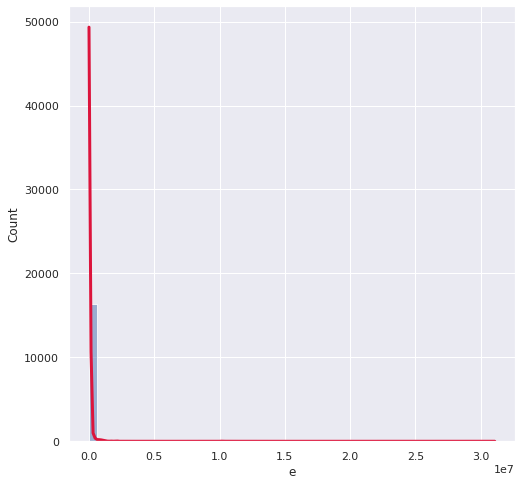

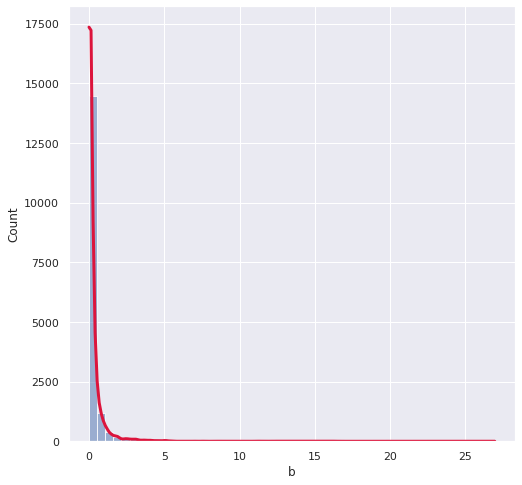

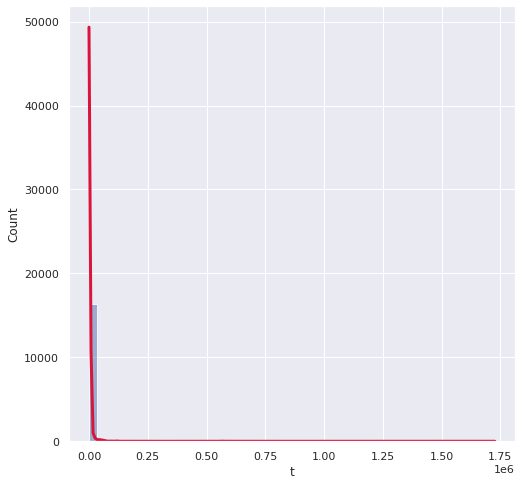

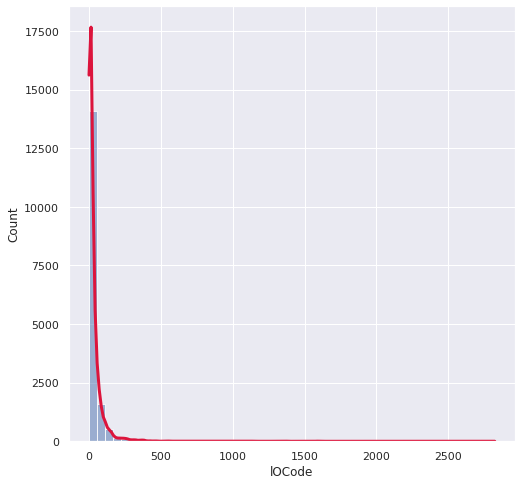

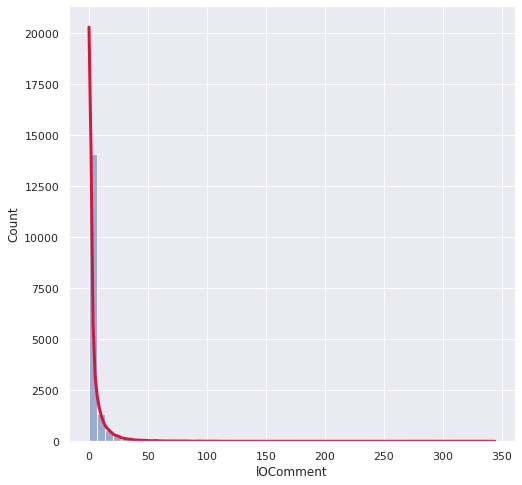

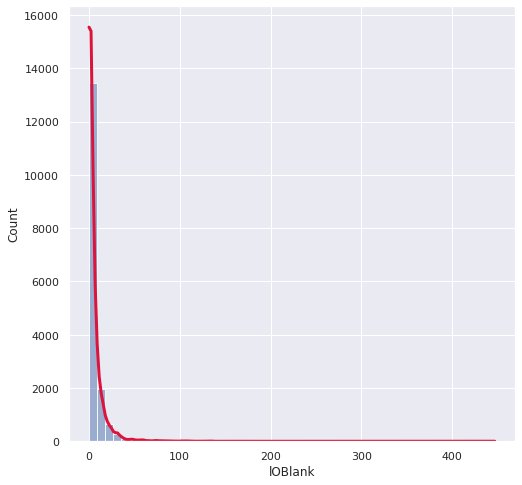

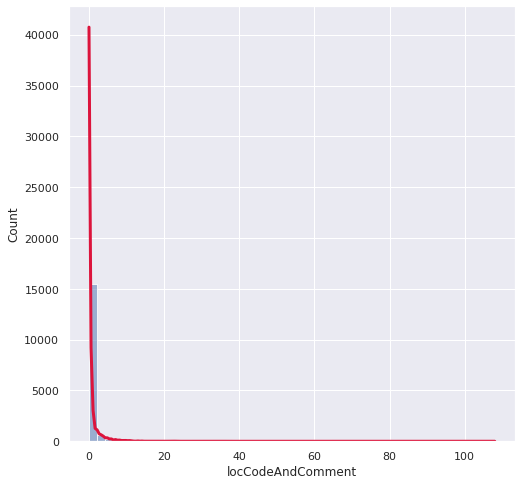

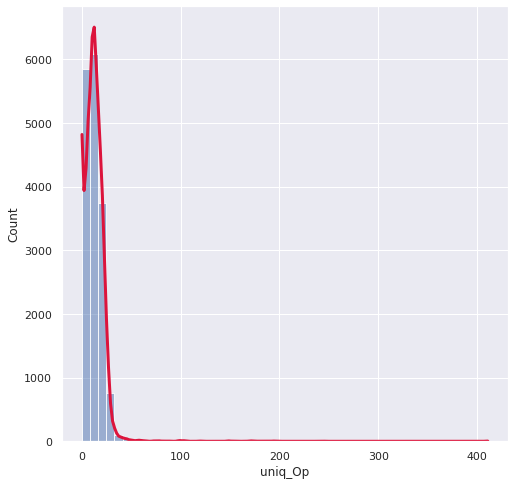

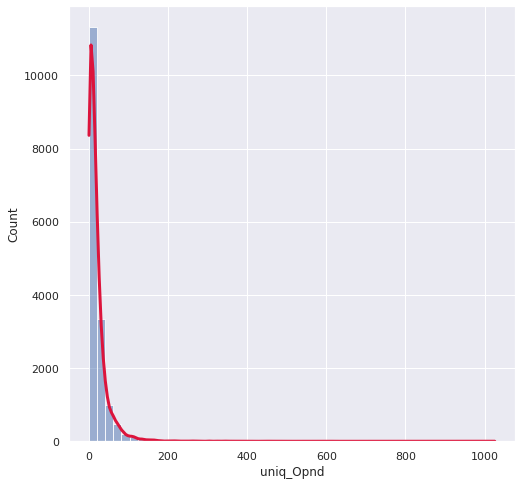

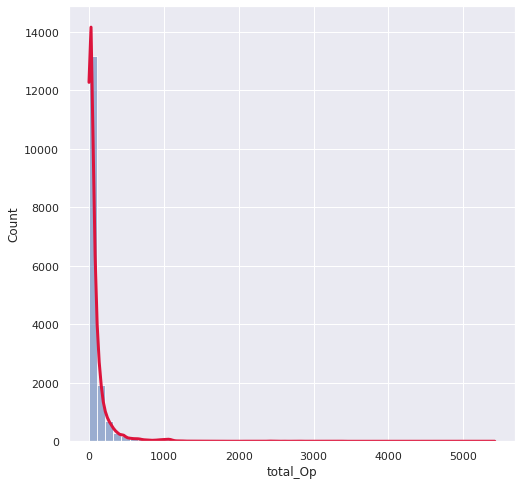

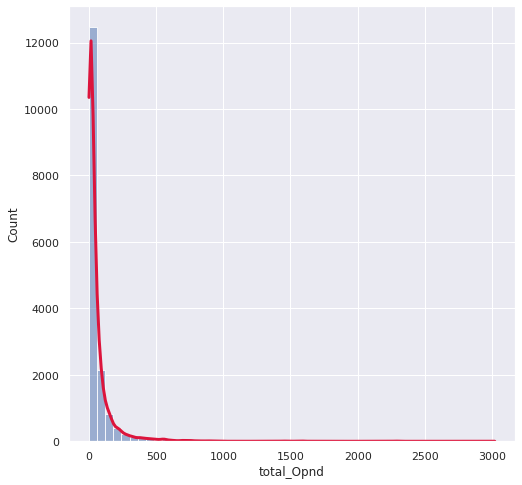

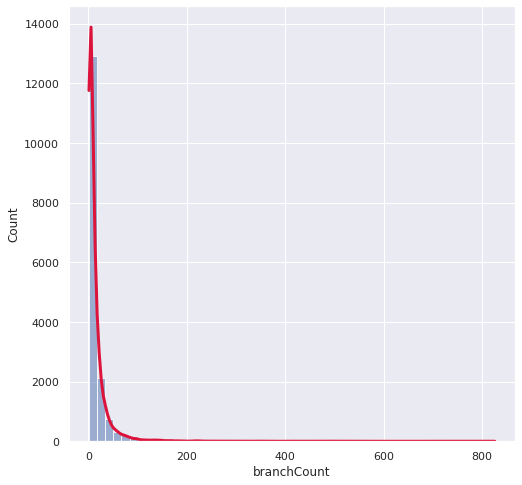

In [24]:
sns.set_color_codes()
for feature in X_resampled.columns:
        plt.figure(figsize = (8,8))
        ax = sns.histplot(X_resampled[feature],kde=True,line_kws={"color": "crimson", "lw": 3, "label": "KDE"}, bins=50,)
        ax.lines[0].set_color('crimson')
        

#### Applying boxplot to check the range of outliers present in.

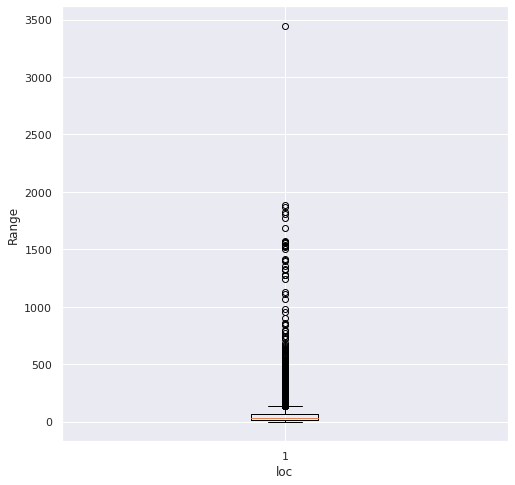

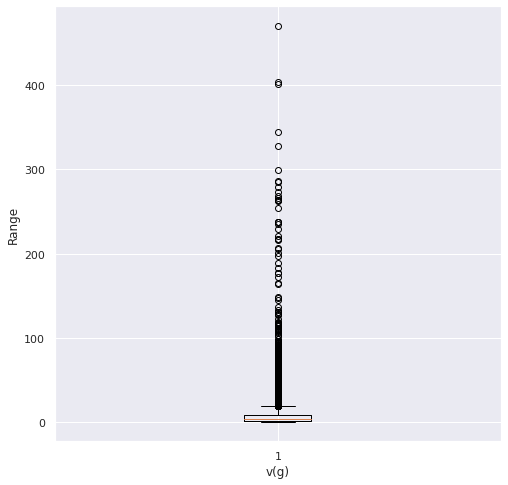

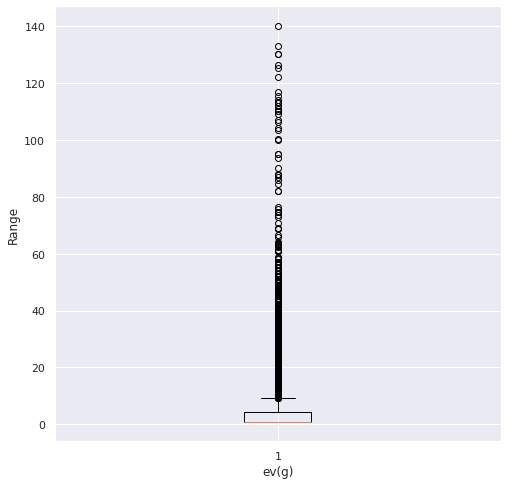

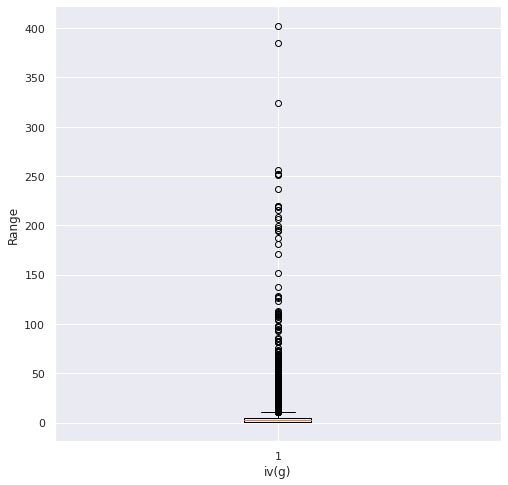

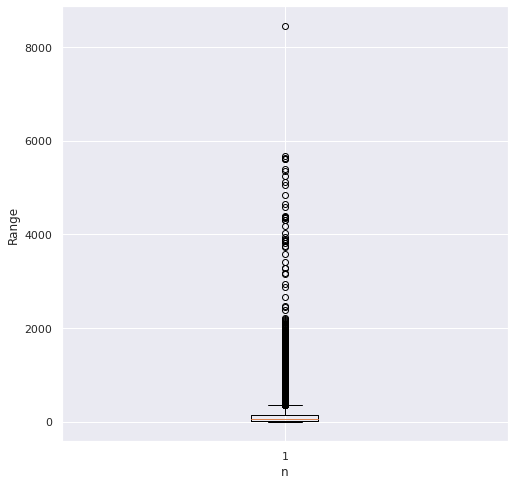

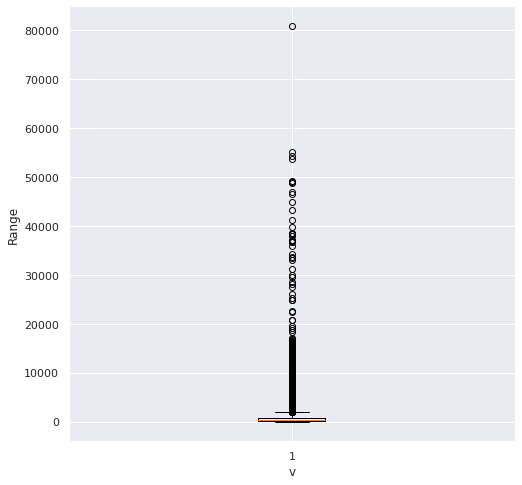

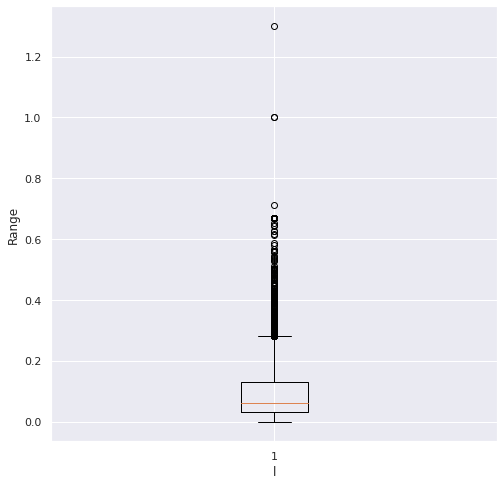

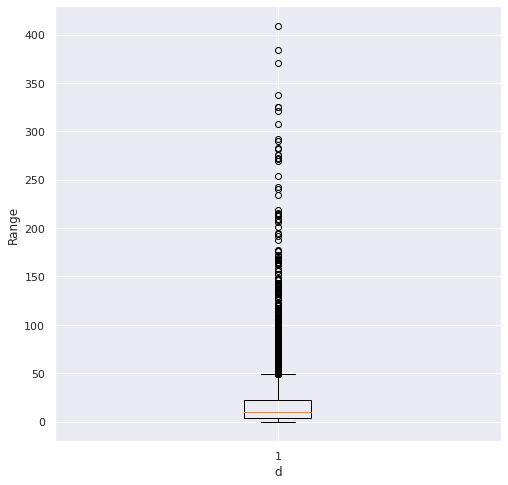

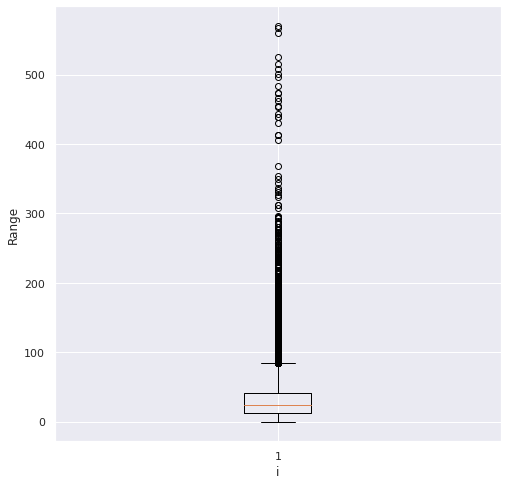

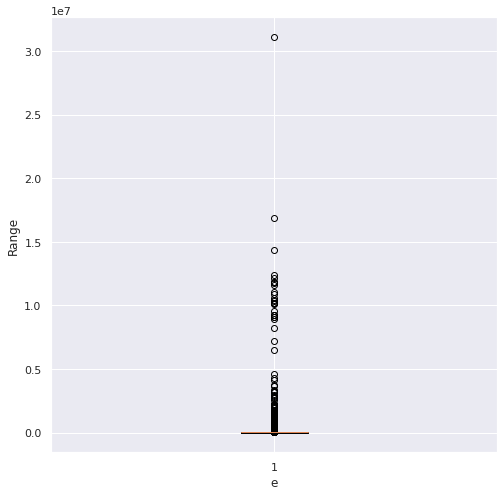

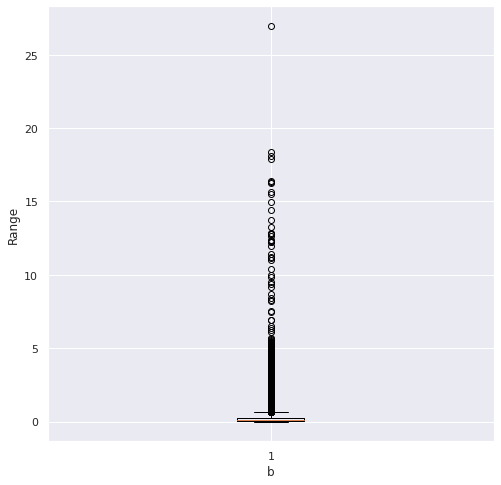

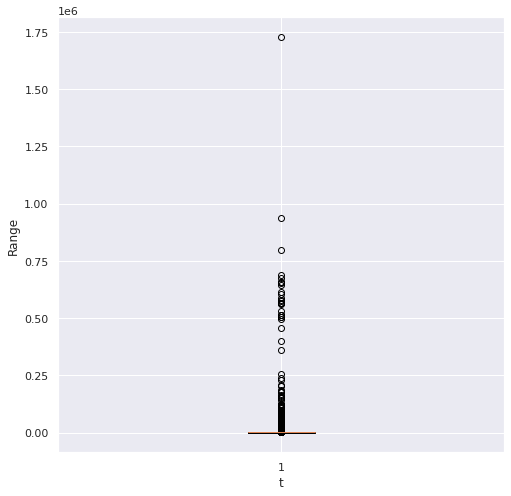

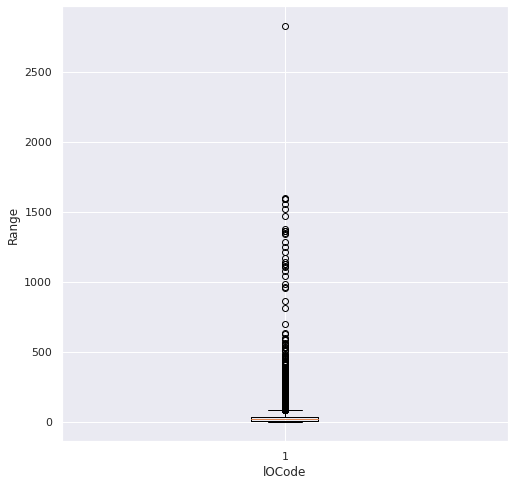

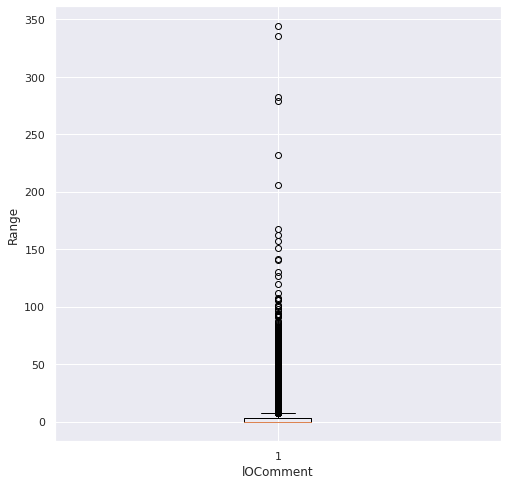

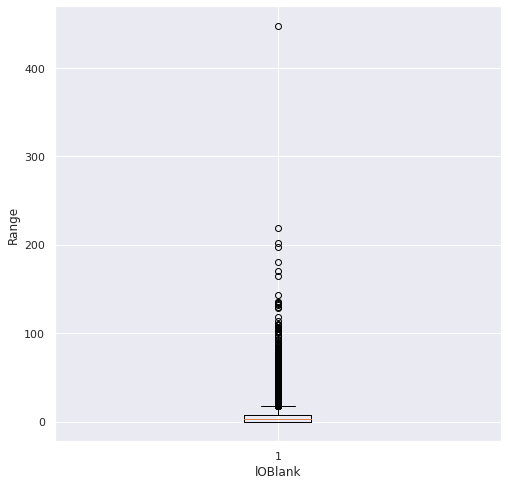

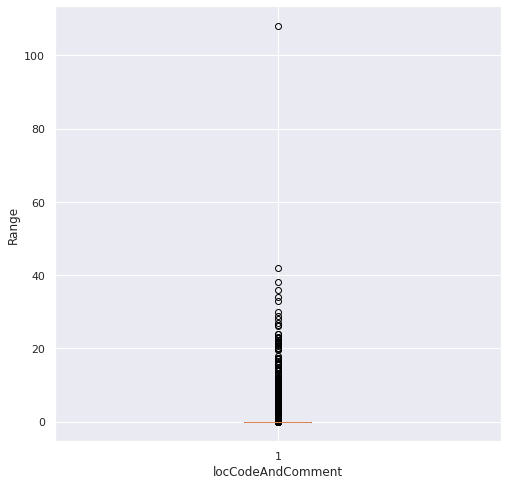

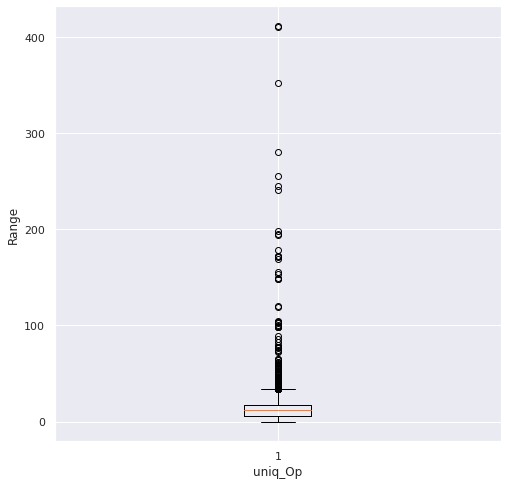

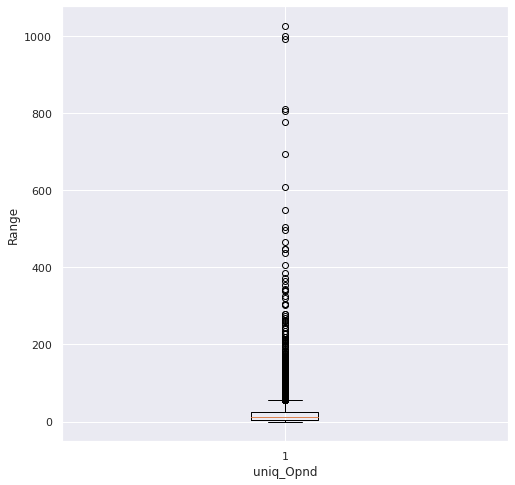

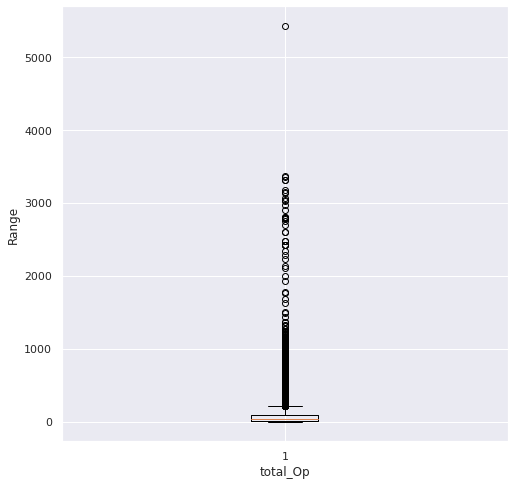

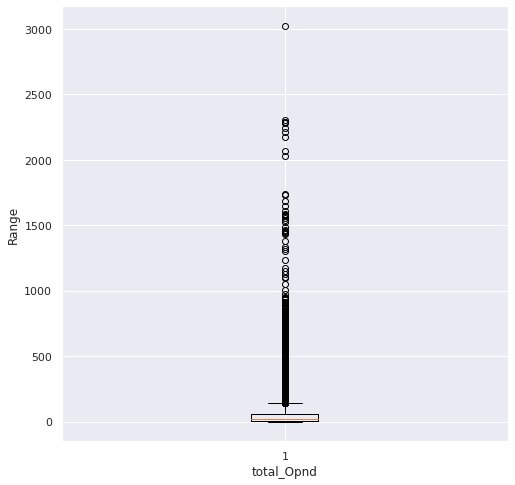

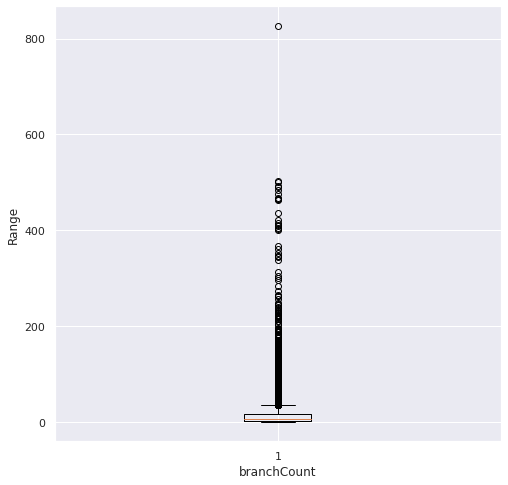

In [25]:
for feature in X_resampled:
        plt.figure(figsize=(8,8))
        plt.boxplot(X_resampled[feature])
        plt.xlabel(feature)
        plt.ylabel('Range')
        plt.show()

#### checking each feature in accordence with target column.

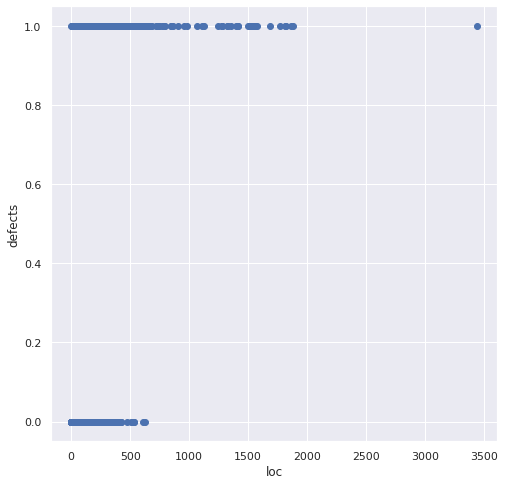

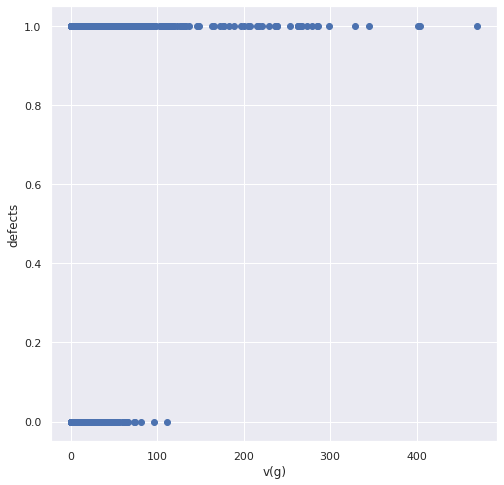

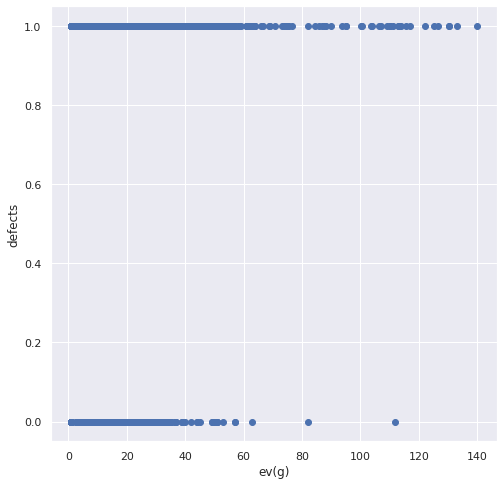

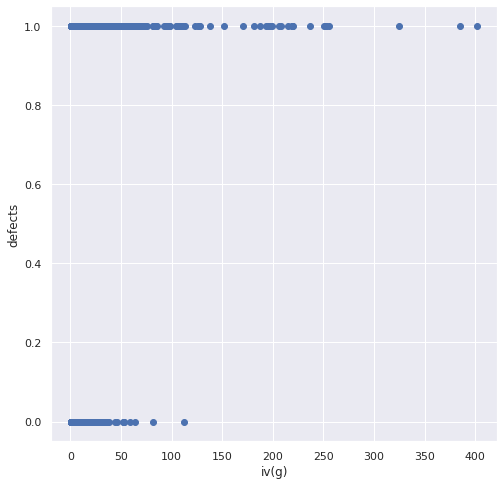

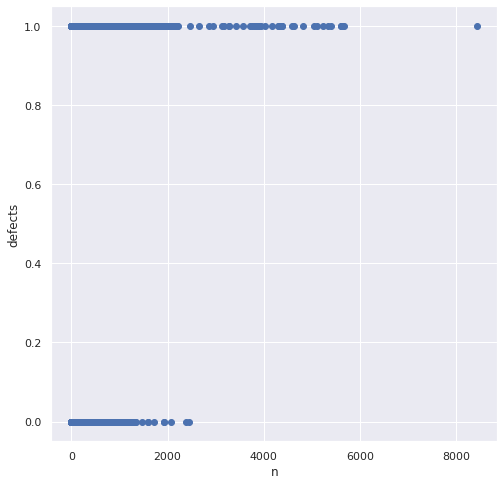

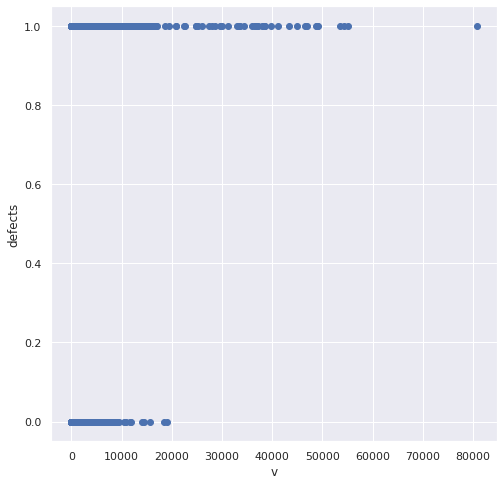

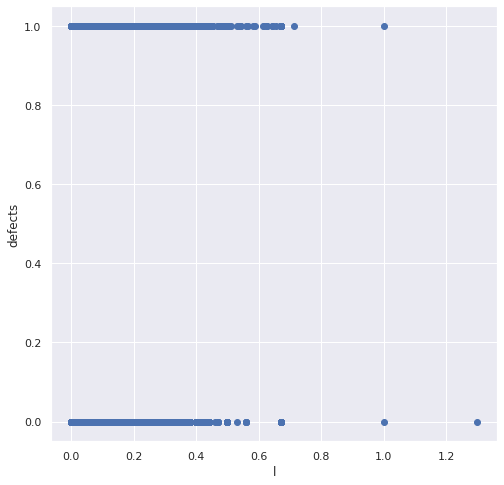

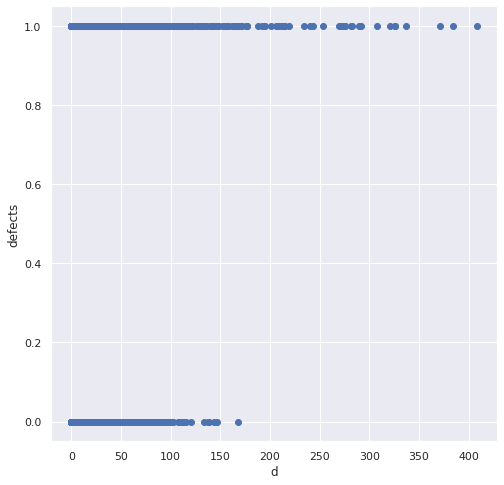

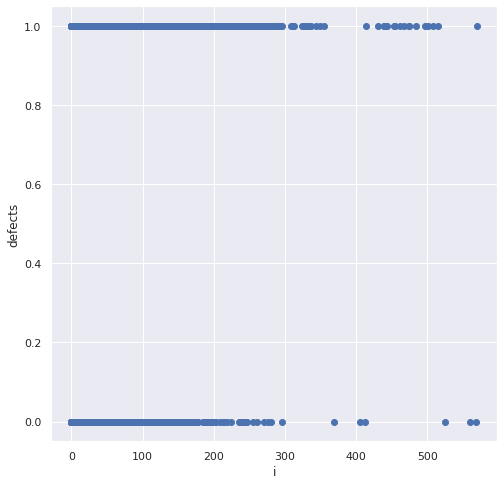

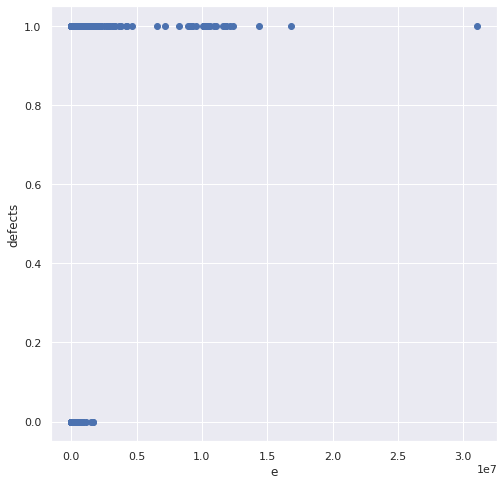

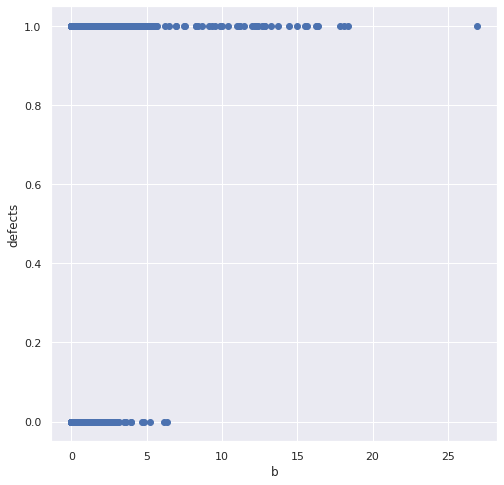

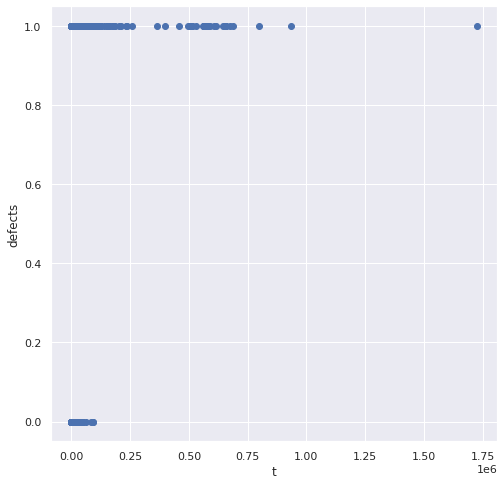

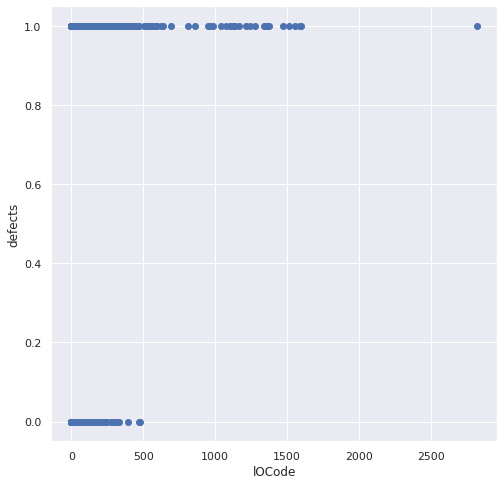

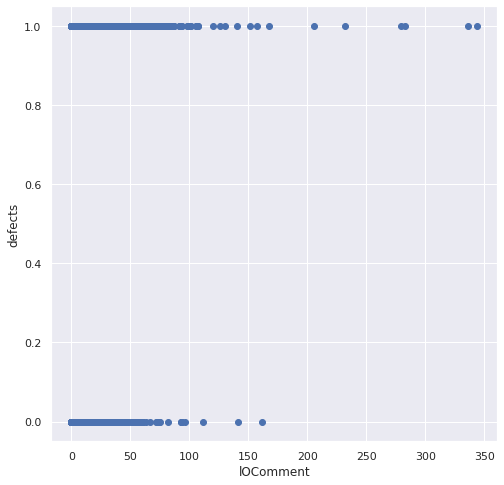

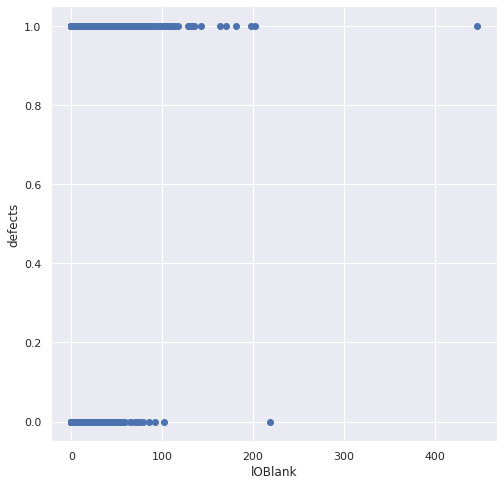

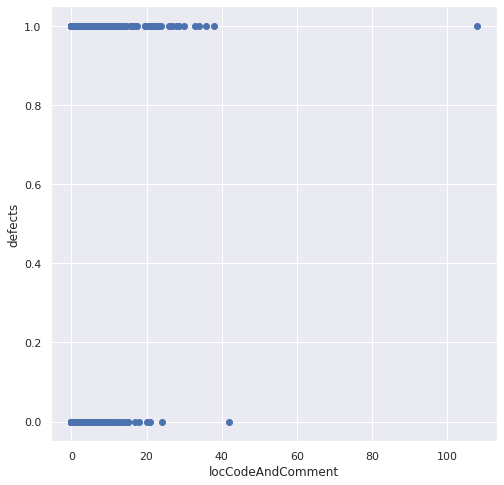

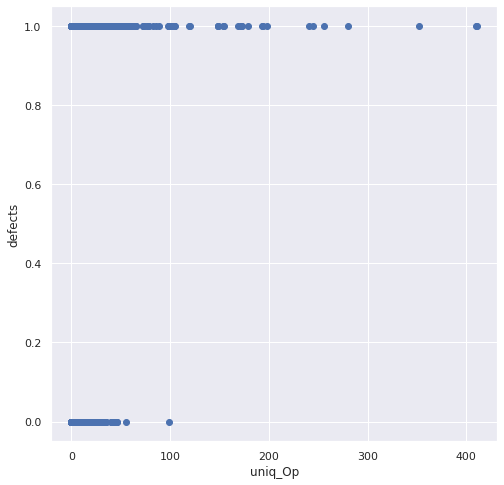

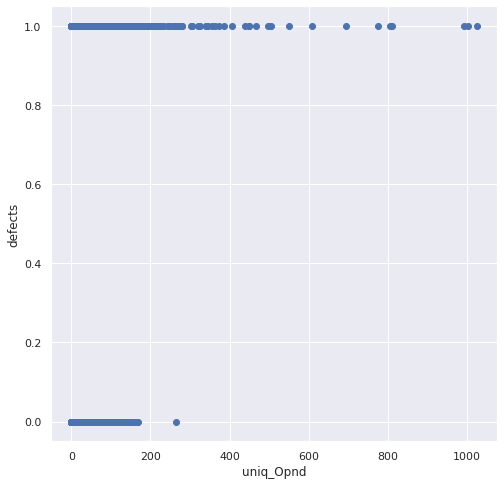

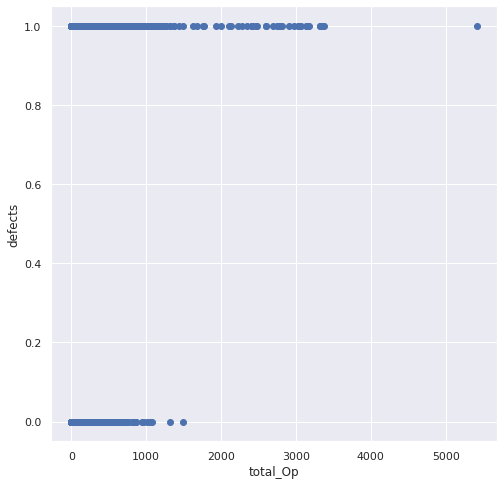

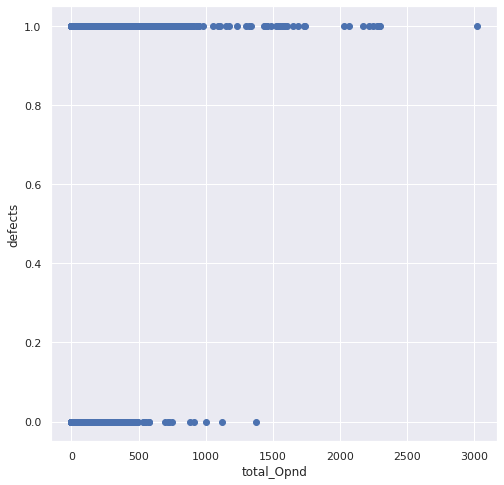

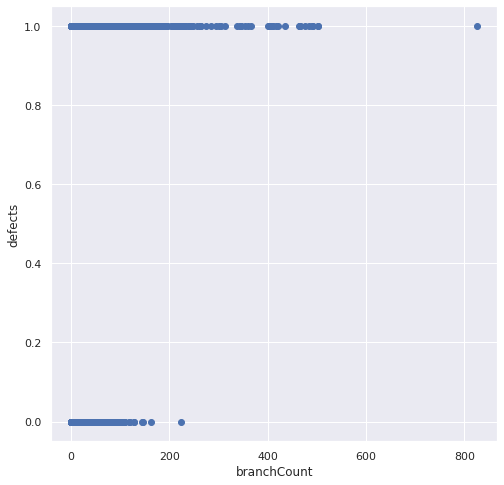

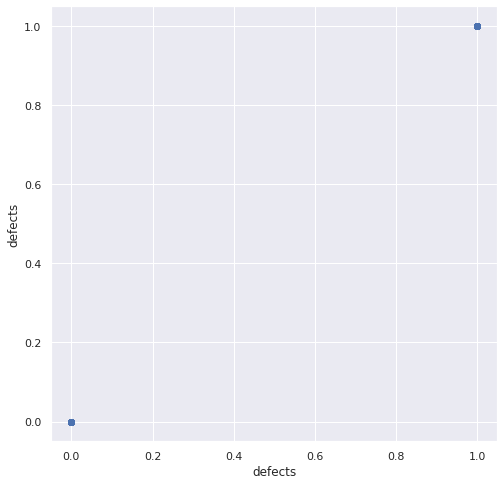

In [26]:
for feature in sampled.columns:
        plt.figure(figsize = (8,8))
        plt.scatter(sampled[feature],sampled['defects'])
        plt.xlabel(feature)
        plt.ylabel('defects')
        plt.show()

#### Splitting the dataset in X and y for chekcing essential columns.

In [27]:
X = sampled.drop('defects', axis=1)
y = sampled['defects']

#### checking the correlation of one feature to other feature.

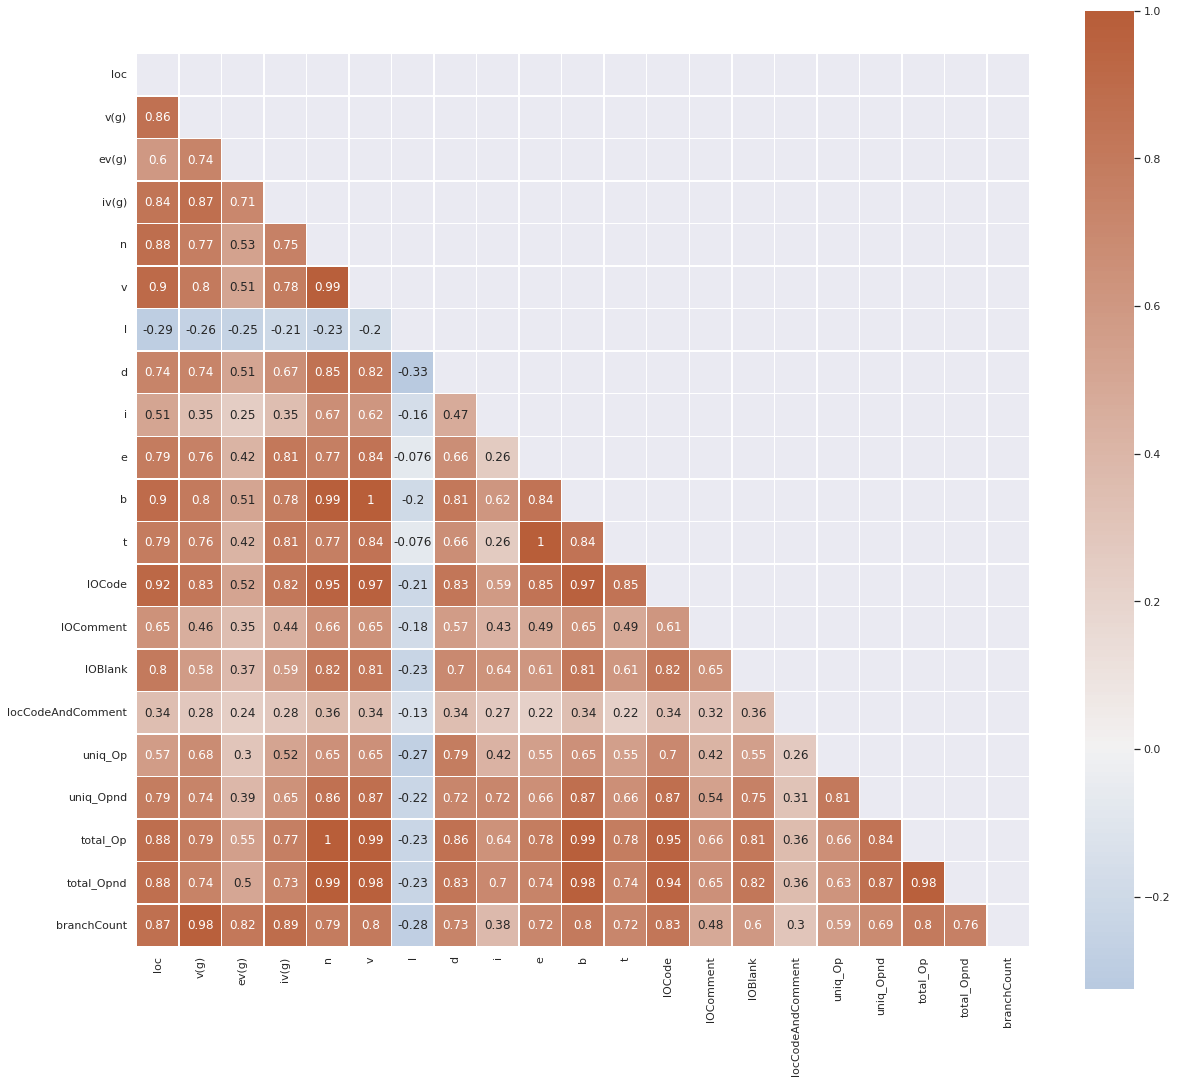

In [28]:
# Correlation matrix
import numpy as np
corr = X.corr()
mask = np.triu(np.ones_like(corr,dtype=np.bool))
f , ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(250,25,as_cmap=True)
sns.heatmap(corr , mask=mask,cmap=cmap,vmax = None,center=0 , 
            square=True,annot=True, linewidths=0.5,cbar_kws={'shrink': .9})


In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rfc
selector = SelectFromModel(rfc(n_estimators=100,random_state=0))
selector.fit(X,y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
imp_fet = rfc(n_estimators=100,random_state=0).fit(X,y).feature_importances_
print(imp_fet)

['loc', 'v(g)', 'ev(g)', 'iv(g)', 'lOBlank', 'branchCount']
[0.11633448 0.07408039 0.05890155 0.10673435 0.03044605 0.03194247
 0.02732281 0.03421859 0.036658   0.03856776 0.02117674 0.03736502
 0.04111749 0.03771631 0.07851881 0.0234068  0.03310723 0.0391227
 0.03436061 0.02907249 0.06982931]


In [30]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

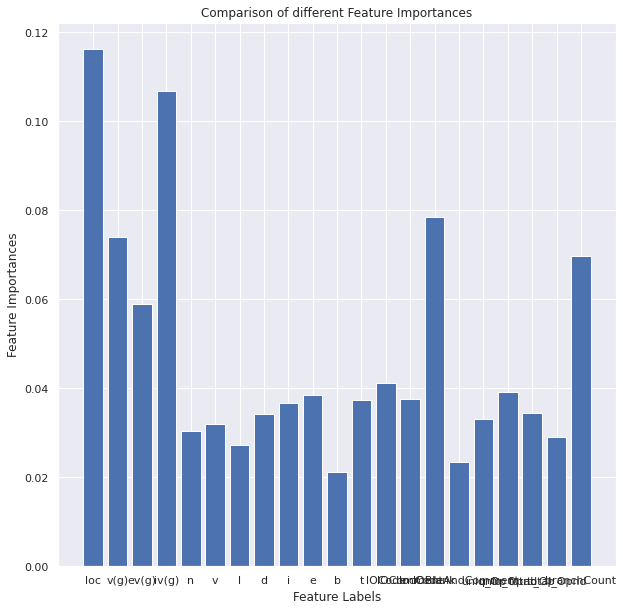

In [31]:
plt.figure(figsize = (10,10))
plt.bar(X.columns, imp_fet)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [33]:
X_new

array([[1.10000000e+00, 1.30000000e+00, 1.30000000e+00, ...,
        1.20000000e+00, 1.20000000e+00, 1.40000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.20000000e+01, 1.98000000e+02, 1.13413000e+03, ...,
        1.12000000e+02, 8.60000000e+01, 1.30000000e+01],
       ...,
       [1.61999163e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.29991630e+01],
       [1.40000000e+01, 2.83038116e+01, 1.14920908e+02, ...,
        1.60000000e+01, 1.23038116e+01, 4.39237680e+00],
       [8.76104263e+00, 1.84129858e+01, 6.55904057e+01, ...,
        1.15870142e+01, 6.82597158e+00, 2.17402842e+00]])

#### spliting the dataset as train and test.

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33, random_state=0)

In [35]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape  # checking the dataset shape after splitting

((11139, 21), (11139,), (5487, 21), (5487,))

#### Performing MinMax to the training data.

In [36]:
from sklearn.preprocessing import MinMaxScaler # Scales the feature values between 0 to 1.
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [37]:
X_train

array([[0.00145307, 0.        , 0.        , ..., 0.00184502, 0.0019861 ,
        0.        ],
       [0.01869671, 0.01350829, 0.0012704 , ..., 0.01951192, 0.02251522,
        0.01535851],
       [0.01015448, 0.01029809, 0.0062864 , ..., 0.01111526, 0.01260328,
        0.01170862],
       ...,
       [0.01656495, 0.01066098, 0.        , ..., 0.01771218, 0.02151605,
        0.01212121],
       [0.02474718, 0.00819821, 0.01728526, ..., 0.        , 0.        ,
        0.00932112],
       [0.00494042, 0.00426439, 0.        , ..., 0.00479705, 0.00628931,
        0.00484848]])

In [38]:
y_train.reset_index(drop=True,inplace=True)   # Resetting index aftersplitting

In [39]:
data_train = pd.DataFrame(X_train, columns=X.columns)   # converting training Independent features into dataframe.
data_train

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,0.001453,0.000000,0.000000,0.000000,0.001896,0.000556,0.192308,0.009786,0.019709,0.000006,0.000371,0.000006,0.000708,0.000000,0.000000,0.047619,0.009756,0.002924,0.001845,0.001986,0.000000
1,0.018697,0.013508,0.001270,0.008736,0.020587,0.011749,0.023722,0.069591,0.058656,0.000869,0.011596,0.000869,0.011957,0.047938,0.029257,0.000000,0.051000,0.023713,0.019512,0.022515,0.015359
2,0.010154,0.010298,0.006286,0.008516,0.011648,0.005747,0.047750,0.042455,0.047566,0.000258,0.005797,0.000258,0.009527,0.008118,0.009496,0.000000,0.030695,0.013479,0.011115,0.012603,0.011709
3,0.024121,0.017058,0.000000,0.007481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019394
4,0.002325,0.000000,0.000000,0.000000,0.003436,0.001401,0.176923,0.010594,0.045895,0.000016,0.001484,0.000016,0.002125,0.000000,0.002237,0.000000,0.014634,0.008772,0.002952,0.004303,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,0.004940,0.004264,0.000000,0.004988,0.004976,0.002207,0.069231,0.028552,0.026835,0.000067,0.002226,0.000067,0.004958,0.002907,0.002237,0.000000,0.024390,0.008772,0.003875,0.006951,0.004848
11135,0.223971,0.290257,0.496413,0.141185,0.371978,0.307700,0.007692,0.287834,0.369080,0.095296,0.307591,0.095296,0.211196,0.222149,0.166951,0.511516,0.100134,0.195200,0.367529,0.379960,0.318012
11136,0.016565,0.010661,0.000000,0.007481,0.019074,0.010215,0.046154,0.041494,0.085472,0.000451,0.010390,0.000451,0.016643,0.000000,0.017897,0.000000,0.029268,0.022417,0.017712,0.021516,0.012121
11137,0.024747,0.008198,0.017285,0.004988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009321


In [40]:
y_train

0        0
1        1
2        1
3        0
4        0
        ..
11134    0
11135    1
11136    0
11137    1
11138    0
Name: defects, Length: 11139, dtype: int64

#### Concatinating training Independent and dependent features into Dataset after scaling and string in data_train_rev variable.

In [41]:
data_train_rev = pd.concat([data_train,y_train],axis=1) # concatinating training Independent and dependent features into Dataset after scaling

In [42]:
data_train_rev

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0.001453,0.000000,0.000000,0.000000,0.001896,0.000556,0.192308,0.009786,0.019709,0.000006,0.000371,0.000006,0.000708,0.000000,0.000000,0.047619,0.009756,0.002924,0.001845,0.001986,0.000000,0
1,0.018697,0.013508,0.001270,0.008736,0.020587,0.011749,0.023722,0.069591,0.058656,0.000869,0.011596,0.000869,0.011957,0.047938,0.029257,0.000000,0.051000,0.023713,0.019512,0.022515,0.015359,1
2,0.010154,0.010298,0.006286,0.008516,0.011648,0.005747,0.047750,0.042455,0.047566,0.000258,0.005797,0.000258,0.009527,0.008118,0.009496,0.000000,0.030695,0.013479,0.011115,0.012603,0.011709,1
3,0.024121,0.017058,0.000000,0.007481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019394,0
4,0.002325,0.000000,0.000000,0.000000,0.003436,0.001401,0.176923,0.010594,0.045895,0.000016,0.001484,0.000016,0.002125,0.000000,0.002237,0.000000,0.014634,0.008772,0.002952,0.004303,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,0.004940,0.004264,0.000000,0.004988,0.004976,0.002207,0.069231,0.028552,0.026835,0.000067,0.002226,0.000067,0.004958,0.002907,0.002237,0.000000,0.024390,0.008772,0.003875,0.006951,0.004848,0
11135,0.223971,0.290257,0.496413,0.141185,0.371978,0.307700,0.007692,0.287834,0.369080,0.095296,0.307591,0.095296,0.211196,0.222149,0.166951,0.511516,0.100134,0.195200,0.367529,0.379960,0.318012,1
11136,0.016565,0.010661,0.000000,0.007481,0.019074,0.010215,0.046154,0.041494,0.085472,0.000451,0.010390,0.000451,0.016643,0.000000,0.017897,0.000000,0.029268,0.022417,0.017712,0.021516,0.012121,0
11137,0.024747,0.008198,0.017285,0.004988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009321,1


In [43]:
data_test = pd.DataFrame(X_test,columns=X.columns)  # converting testing Independent features into dataframe.
data_test

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,0.000872,0.000000,0.000000,0.000000,0.001659,0.000599,0.307692,0.006117,0.033996,0.000004,0.000742,0.000004,0.000708,0.000000,0.000000,0.0,0.012195,0.005848,0.001476,0.001986,0.000000
1,0.006103,0.004264,0.000000,0.004988,0.009122,0.004846,0.076923,0.024686,0.068132,0.000127,0.004824,0.000127,0.005666,0.000000,0.008949,0.0,0.029268,0.021442,0.007380,0.012248,0.004848
2,0.004940,0.006397,0.000000,0.007481,0.006160,0.003058,0.076923,0.024466,0.043403,0.000080,0.002968,0.000080,0.005312,0.000000,0.002237,0.0,0.029268,0.014620,0.004982,0.008275,0.007273
3,0.005522,0.004264,0.000000,0.004988,0.004857,0.002228,0.084615,0.022827,0.033855,0.000054,0.002226,0.000054,0.004958,0.000000,0.008949,0.0,0.029268,0.008772,0.004982,0.004634,0.004848
4,0.021714,0.028976,0.069803,0.010868,0.030282,0.017506,0.016896,0.099029,0.063183,0.001819,0.017420,0.001819,0.022423,0.012148,0.012104,0.0,0.048780,0.025673,0.028028,0.034326,0.032944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5482,0.036617,0.046908,0.037879,0.019950,0.066106,0.042586,0.015385,0.157292,0.093984,0.007121,0.042672,0.007121,0.036119,0.020349,0.035794,0.0,0.073171,0.040936,0.069742,0.059583,0.053333
5483,0.008718,0.012793,0.037879,0.002494,0.007108,0.003403,0.038462,0.048932,0.024132,0.000177,0.003340,0.000177,0.007790,0.005814,0.006711,0.0,0.036585,0.008772,0.006642,0.007944,0.014545
5484,0.006684,0.014925,0.015152,0.007481,0.008293,0.004249,0.046154,0.038387,0.038418,0.000173,0.004082,0.000173,0.007436,0.000000,0.002237,0.0,0.041463,0.012671,0.008487,0.007944,0.016970
5485,0.013368,0.014925,0.045455,0.004988,0.015164,0.008483,0.061538,0.032369,0.090965,0.000292,0.008534,0.000292,0.014873,0.000000,0.004474,0.0,0.031707,0.027290,0.013100,0.018868,0.016970


In [44]:
y_test.reset_index(drop=True,inplace=True) # Resetting index aftersplitting

#### Concatinating testing Independent and dependent features into Dataset after scaling and storing in data_test_rev variable.

In [45]:
data_test_rev = pd.concat([data_test,y_test],axis=1) 

#### Saving the dataset after preprocessing work and for model building.

In [ ]:
data_train_rev.to_csv('data_train_rev.csv',index=False) 

In [ ]:
data_test_rev.to_csv('data_test_rev.csv',index=False)

#### Splitting dataset into dependent and independent feature for training from _data_train_rev.

In [46]:
X_train = data_train_rev.drop('defects',axis=1)
y_train = data_train_rev['defects']

In [47]:
y_train

0        0
1        1
2        1
3        0
4        0
        ..
11134    0
11135    1
11136    0
11137    1
11138    0
Name: defects, Length: 11139, dtype: int64

#### Not handling outliuuers instead using Algorithams which are robust to ouliers.

#### Checking accuracy with different ML Algoritham using Kfold cross validation technique.

In [48]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10)
model = DecisionTreeClassifier()
scoring = 'accuracy'
result = cross_val_score(model,X_train,y_train, cv=kfold, scoring=scoring)
print(result.mean())


0.8255669491128994


#### Splitting dataset into dependent and independent feature for testing from _data_test_rev.

In [49]:
X_test = data_test_rev.drop('defects',axis=1)
y_test = data_test_rev['defects']

#### Appplying RandomForestClassifier

In [50]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
kfold = KFold(n_splits=10)
model = RandomForestClassifier()
scoring = 'accuracy'
result = cross_val_score(model,X_train,y_train, cv=kfold, scoring=scoring)
print(result.mean())

0.8796120921184436


#### Applying Support vector machine algoritham for classification.

In [53]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
kfold = KFold(n_splits=10)
model = SVC(kernel = 'rbf')
scoring = 'accuracy'
result = cross_val_score(model,X_train,y_train, cv=kfold, scoring=scoring)
print(result.mean())

0.6730412248907557


#### Applying Naive Base Classifier

In [54]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
kfold = KFold(n_splits=10)
model =GaussianNB()
scoring = 'accuracy'
result = cross_val_score(model,X_train,y_train, cv=kfold, scoring=scoring)
print(result.mean())

0.5900908312242616


#### Applying XGBoost classifier

In [55]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
kfold = KFold(n_splits=10)
model =XGBClassifier()
scoring = 'accuracy'
result = cross_val_score(model,X_train,y_train, cv=kfold, scoring=scoring)
print(result.mean())

0.8274551126639471


#### From above model building RnadomForest has performce beeter compare to other ML Algoritham

#### Appying Randomforest and checking the accuracy on test dataset

#### Model also perform best on Test data. gives accuracy of 87%

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f'accuracy = "\n" {accuracy_score(y_test,y_pred)}')
print(f'matrix   = "\n" {confusion_matrix(y_test,y_pred)}')
print(f'report = "\n" {classification_report(y_test,y_pred)}')


accuracy = "
" 0.8738837251685803
matrix   = "
" [[2427  324]
 [ 368 2368]]
report = "
"               precision    recall  f1-score   support

           0       0.87      0.88      0.88      2751
           1       0.88      0.87      0.87      2736

    accuracy                           0.87      5487
   macro avg       0.87      0.87      0.87      5487
weighted avg       0.87      0.87      0.87      5487



#### Performing Hyperparameter tunning on RandomFroest using RandomizedSearchCV.

In [57]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10, 15, 20]

min_samples_leaf = [1, 2, 4, 6, 8]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4, 6, 8], 'bootstrap': [True, False]}


In [58]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 91.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### Model perform somewhat same with 1% increase in the accuracy.

In [59]:
y_pred = rf_random.predict(X_test)
print(f'accuracy = "\n" {accuracy_score(y_test,y_pred)}')
print(f'matrix   = "\n" {confusion_matrix(y_test,y_pred)}')
print(f'report = "\n" {classification_report(y_test,y_pred)}')

accuracy = "
" 0.8835429196282122
matrix   = "
" [[2453  298]
 [ 341 2395]]
report = "
"               precision    recall  f1-score   support

           0       0.88      0.89      0.88      2751
           1       0.89      0.88      0.88      2736

    accuracy                           0.88      5487
   macro avg       0.88      0.88      0.88      5487
weighted avg       0.88      0.88      0.88      5487

